In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

In [2]:
#Read the data

df = pd.read_csv('data.csv')

In [3]:
#Print the first 7 lines to visualize the data structure
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [4]:
#look at the size of our data

df.shape

(569, 33)

In [5]:
#Check if there is any column with null values

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#Drop the null column

df = df.dropna(axis=1)
df.shape

(569, 32)

In [7]:
#Counting the distribution of the M(Malignant) or B(Benign) diagnosis

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

c:\users\pimen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

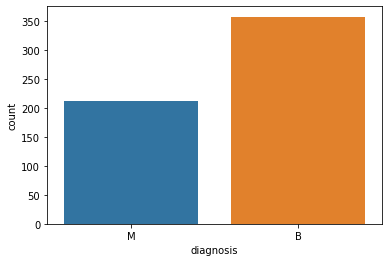

In [8]:
#Plot count

sns.countplot(df['diagnosis'],label="Count")

In [9]:
#See if the objects are all numbers and for that we observe the type of each column

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
#Since the diagnostic column was not a number, let's transform it to 1(Malign) and 0(Benign)

from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1:5]

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,1,17.99,10.38,122.80
1,1,20.57,17.77,132.90
2,1,19.69,21.25,130.00
3,1,11.42,20.38,77.58
4,1,20.29,14.34,135.10
...,...,...,...,...
564,1,21.56,22.39,142.00
565,1,20.13,28.25,131.20
566,1,16.60,28.08,108.30
567,1,20.60,29.33,140.10


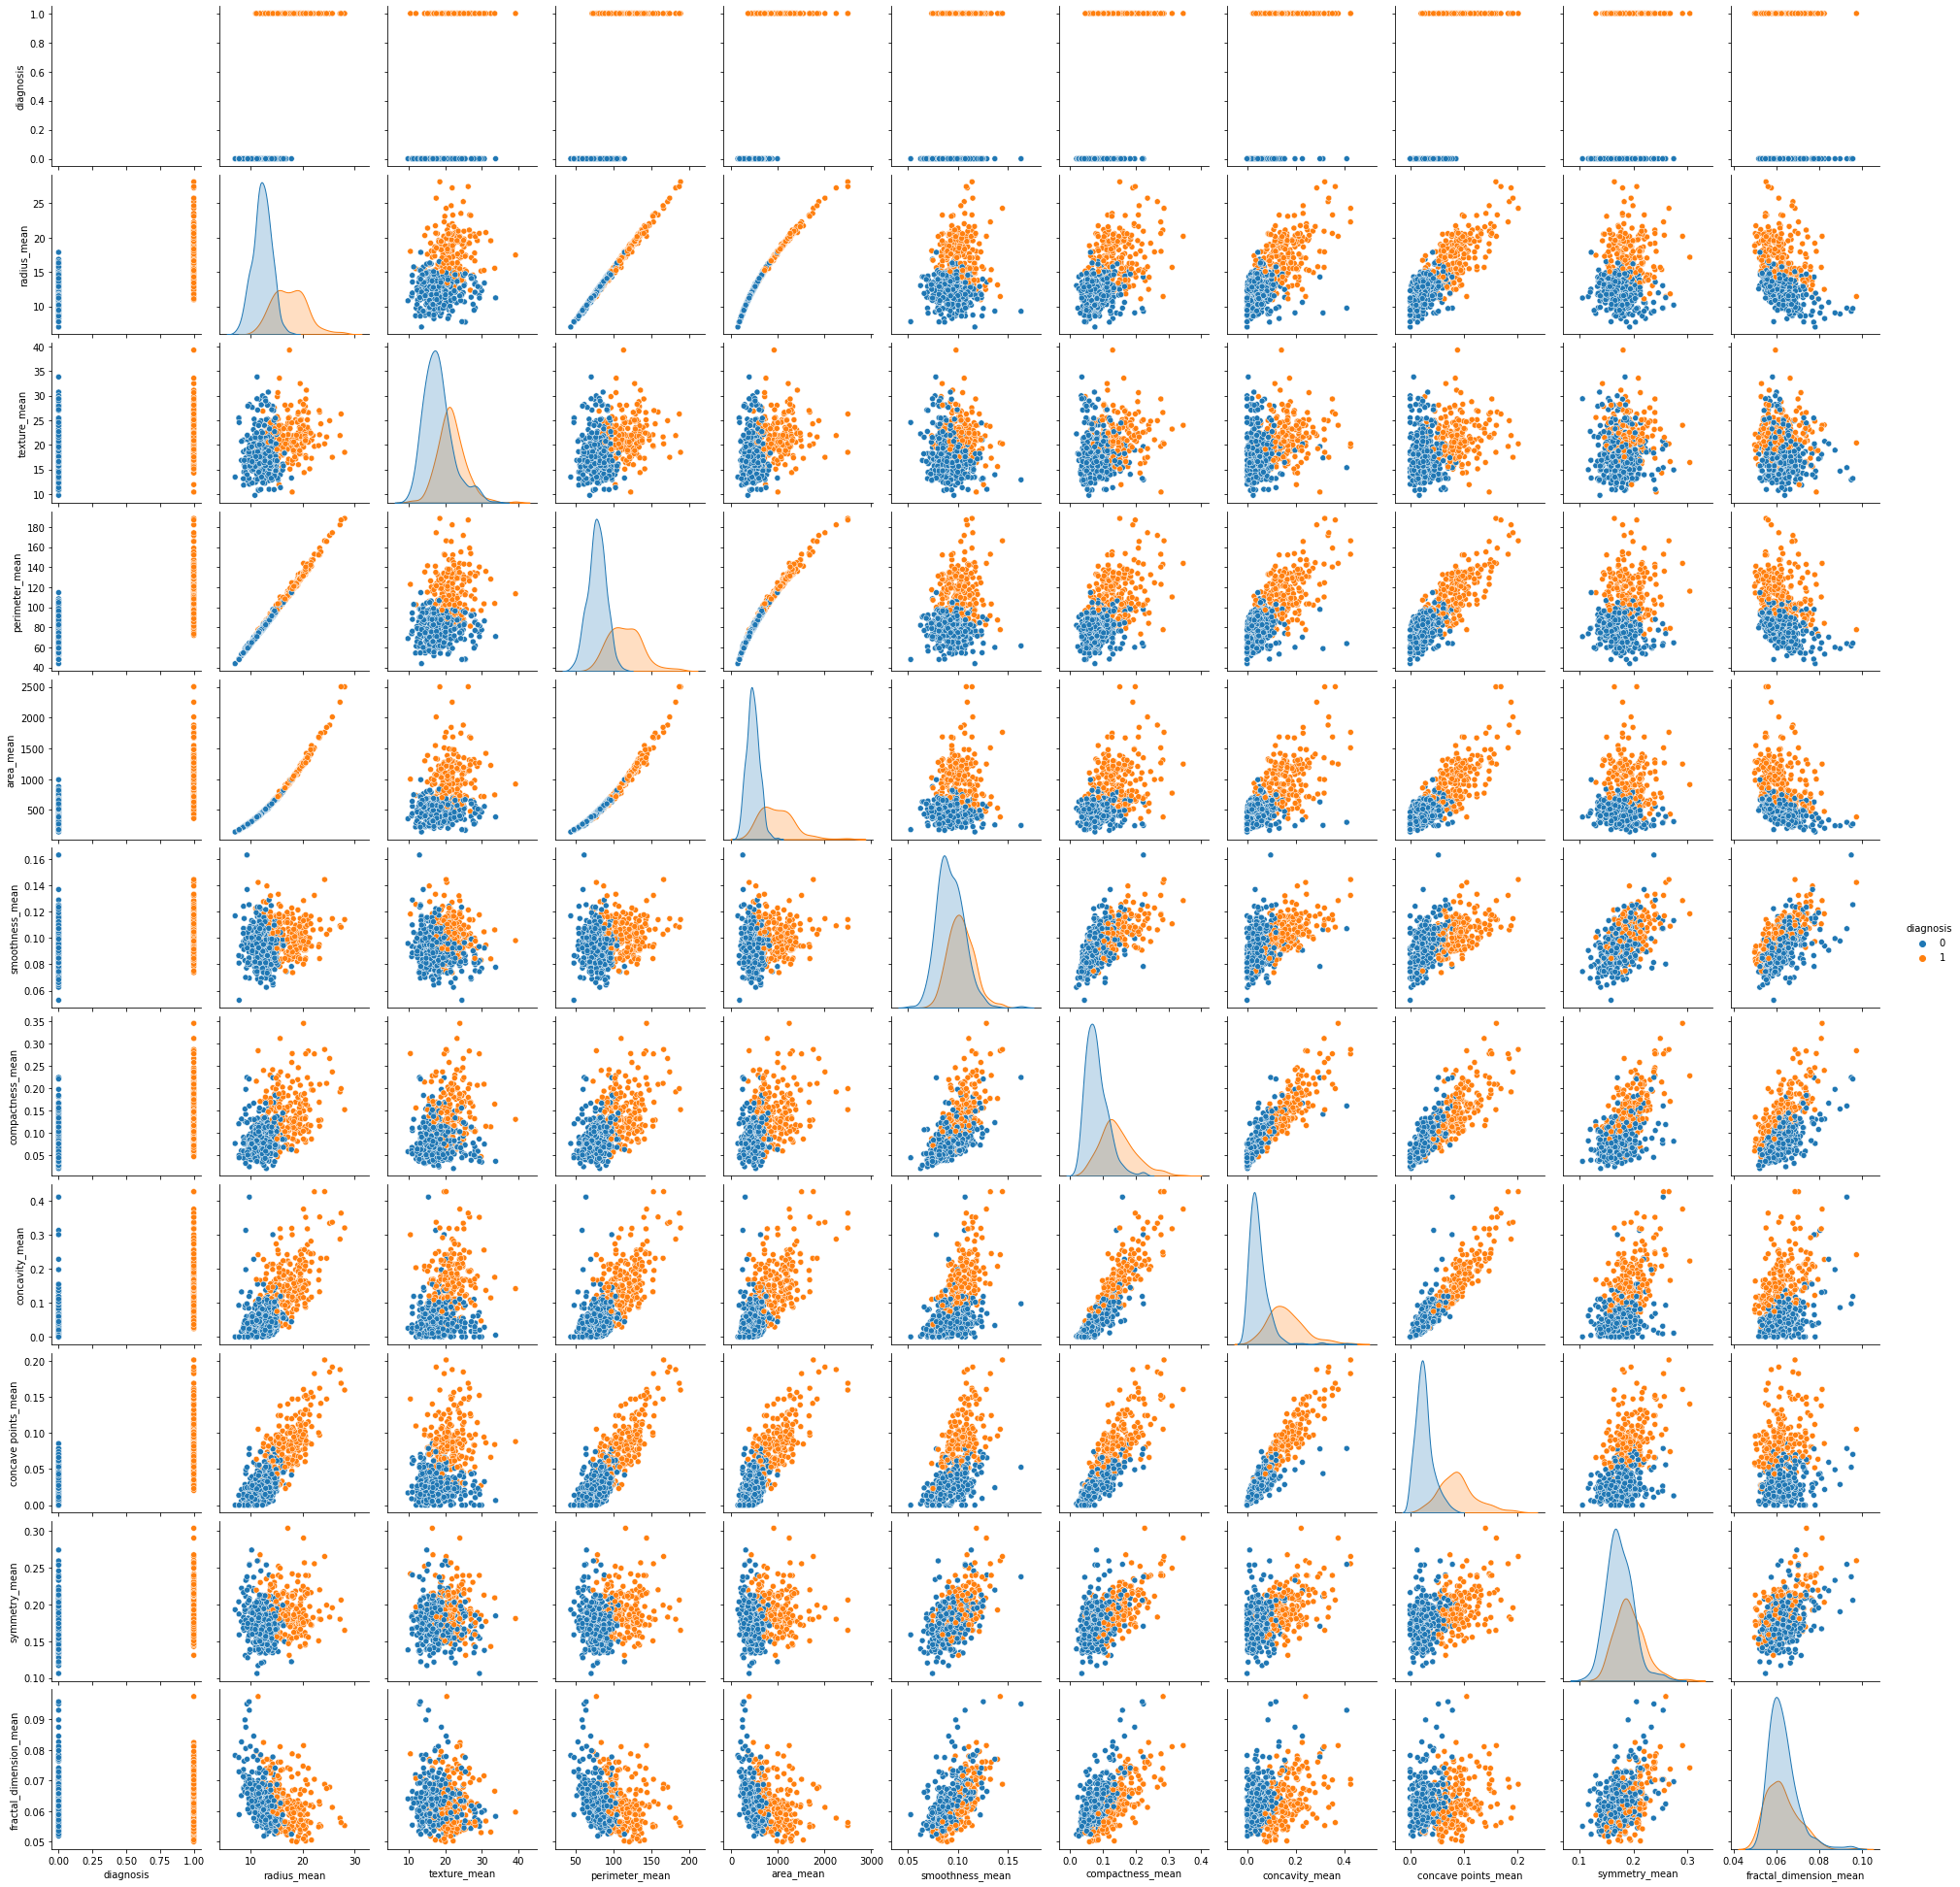

In [11]:
#see the data relation and diagnosis distribution(part of the data,only mean variables)

sns.pairplot(df,hue="diagnosis", vars =['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])

In [12]:
#see all data relation and diagnosis distribution
#sns.pairplot(df,hue="diagnosis")

In [13]:
#Print the first 5 lines to visualize the data structure

df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
#Variable Id is not necessary to the results, so we drop it
df=df.drop('id',axis = 1 )
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#Calculate the variables correlations
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

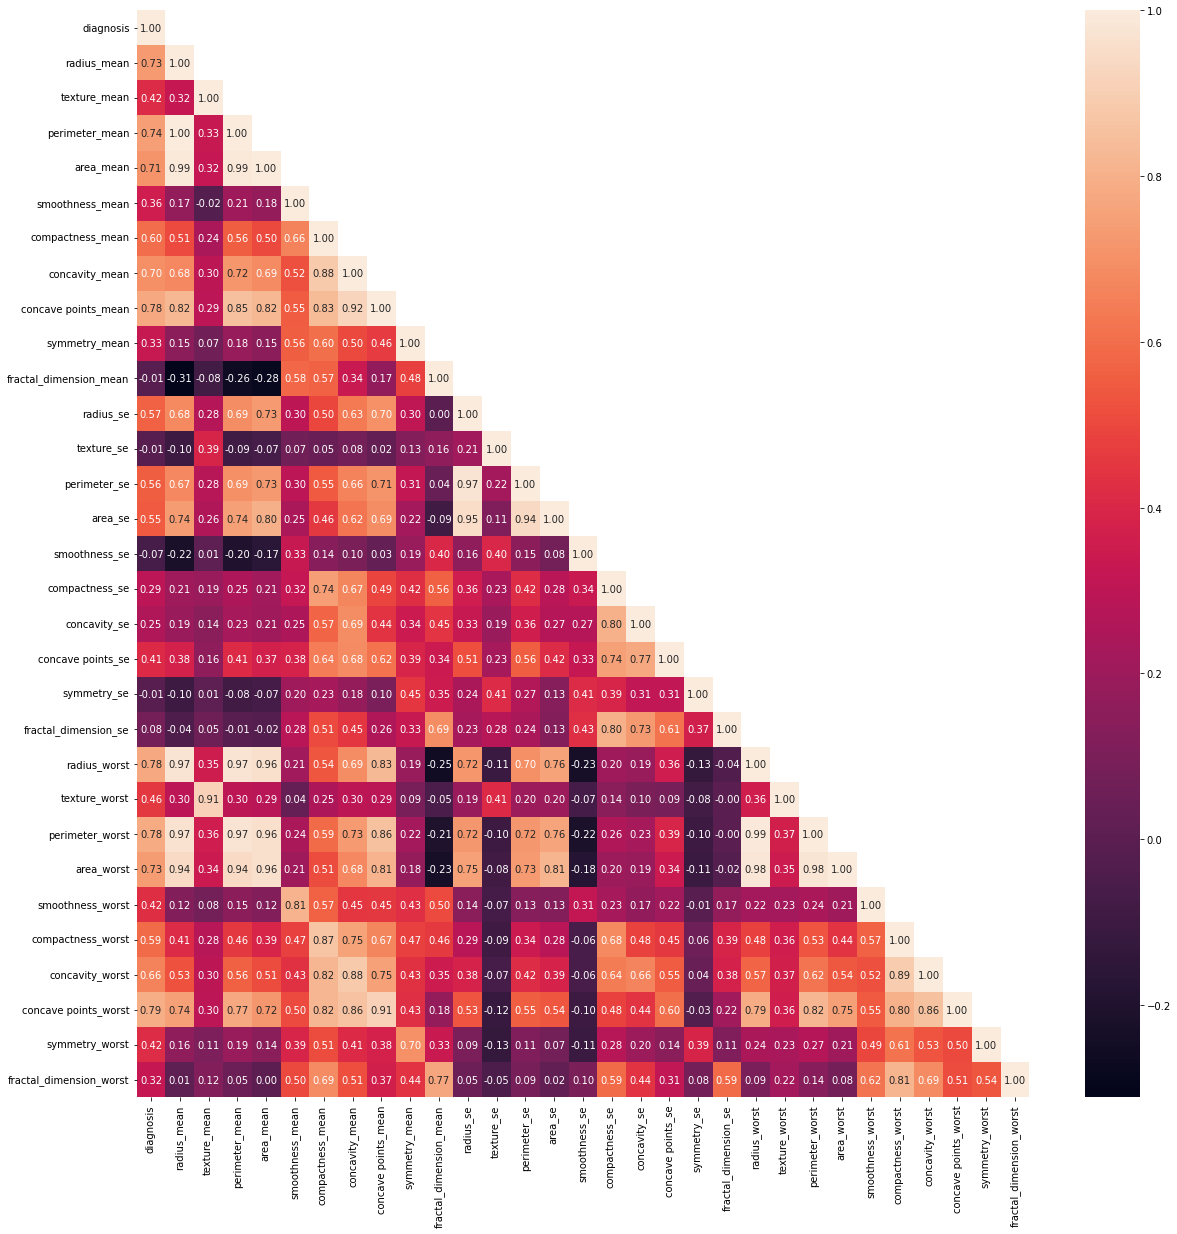

In [16]:
#Heat map with all correlations
matrix = np.triu(df.corr()-1)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', mask=matrix)

In [17]:
#Split the data set into independent(X) and dependent(Y) data sets
#X will tell us the features that can detect if the patient has cancer or not
#Y will tell us if the patient has cancer or not(target value)
X=df.iloc[:,1:30].values
Y=df.iloc[:,0].values

In [18]:
from sklearn.model_selection import train_test_split
#Split the data set into 55% training and 45% testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.45,random_state=0)

In [19]:
#Scale the data(Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
#Neural network training 
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense
model = Sequential()
model.add(Dense(11, input_dim=29, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
neural=model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
10/10 [==============================] - 1s 2ms/step - loss: 1.0060 - accuracy: 0.3750
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.5256
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.6506
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7821
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.8590
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8942
Epoch 7/300
10/10 [==============================] - 0s 889us/step - loss: 0.3940 - accuracy: 0.9103
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.9295
Epoch 9/300
10/10 [==============================] - 0s 889us/step - loss: 0.3198 - accuracy: 0.9423
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9455
Epoch

In [21]:
#Neural Network forecast and testing accuracy
Y_pred_nn=model.predict(X_test)
#shape of forecast values
Y_pred_nn.shape
rounded= [round (x[0]) for x in Y_pred_nn]
Y_pred_nn=rounded
score_nn=round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("Testing accuracy achieved using Neural Network is: "+str(score_nn)+" %")

Testing accuracy achieved using Neural Network is: 96.11 %


In [22]:
def models(X_train,Y_train):
    #Using KNeighborsClassifier 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    #Using GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    # Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)

    # Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)

    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log =LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)

    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion= 'entropy', random_state=0)
    tree.fit(X_train,Y_train)

    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    print('[0]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[1]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy:',svc_lin.score(X_train,Y_train))
    print('[3]SVC rbf Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return knn,gauss,svc_lin, svc_rbf, log, tree, forest


In [23]:
#Models Training Accuracy(except Neural Network)
model_=models(X_train,Y_train)
name_models=["K Nearest Neighbor","Gaussion Naive Bayes","SVC Linear","SVC rbf","Logistic Regression","Decision Tree Classifier","Random Forest Classifier"]

[0]K Nearest Neighbor Training Accuracy: 0.9807692307692307
[1]Gaussian Naive Bayes Training Accuracy: 0.9519230769230769
[2]SVC Linear Training Accuracy: 0.9903846153846154
[3]SVC rbf Training Accuracy: 0.9807692307692307
[4]Logistic Regression Training Accuracy: 0.9903846153846154
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9967948717948718


In [24]:
#Models Testing Accuracy(except Neural Network)
from sklearn.metrics import confusion_matrix
for i in range(len(model_)):
    print("Model",name_models[i])
    cm=confusion_matrix(Y_test,model_[i].predict(X_test))
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    print(cm)
    print('Testing Accuracy= ',(TP+TN)/(TP+TN+FN+FP))

Model K Nearest Neighbor
[[158   2]
 [ 11  86]]
Testing Accuracy=  0.9494163424124513
Model Gaussion Naive Bayes
[[155   5]
 [ 11  86]]
Testing Accuracy=  0.9377431906614786
Model SVC Linear
[[154   6]
 [  5  92]]
Testing Accuracy=  0.9571984435797666
Model SVC rbf
[[159   1]
 [  4  93]]
Testing Accuracy=  0.980544747081712
Model Logistic Regression
[[156   4]
 [  5  92]]
Testing Accuracy=  0.9649805447470817
Model Decision Tree Classifier
[[149  11]
 [ 11  86]]
Testing Accuracy=  0.914396887159533
Model Random Forest Classifier
[[156   4]
 [ 11  86]]
Testing Accuracy=  0.9416342412451362


In [25]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model_)):
    print("Model",name_models[i])
    print(classification_report(Y_test,model_[i].predict(X_test)))
    print(accuracy_score(Y_test,model_[i].predict(X_test)))

Model K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       160
           1       0.98      0.89      0.93        97

    accuracy                           0.95       257
   macro avg       0.96      0.94      0.95       257
weighted avg       0.95      0.95      0.95       257

0.9494163424124513
Model Gaussion Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       160
           1       0.95      0.89      0.91        97

    accuracy                           0.94       257
   macro avg       0.94      0.93      0.93       257
weighted avg       0.94      0.94      0.94       257

0.9377431906614786
Model SVC Linear
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       160
           1       0.94      0.95      0.94        97

    accuracy                           0.96       257
   macro avg       0.

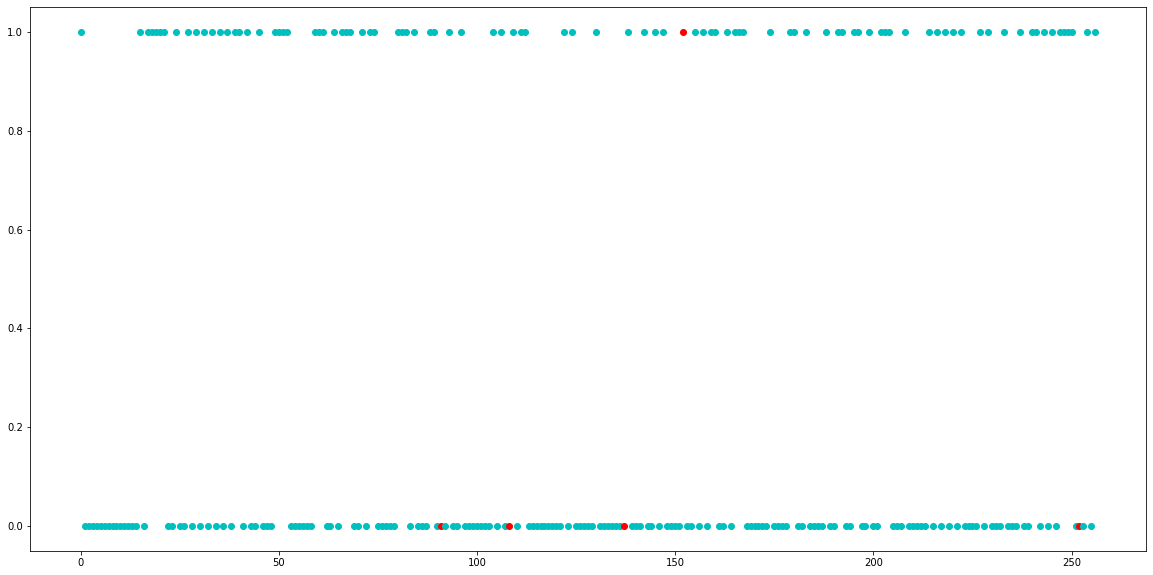

In [26]:
#Results of the best model studied(Model SVC RBF)
pred=model_[3].predict(X_test)
plt.figure(figsize=(20,10))
for i in range(len(Y_test)):
    if pred[i]!=Y_test[i]:
        plt.plot(i,pred[i],'r',marker='o')
    else:
        plt.plot(i,pred[i],'c',marker='o')
